# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*



In the present study I have analyzed The Pens and Printers dataset (product_sales.csv) using pandas and seaborn Python packages.

**Objectives.**

The executive team of Pens and Printers needs updated information on sales approaches (Email, Call and a combination of Call and Email) for the new product line. The questions to be answered are the following:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the method?
- Based on the data, which method would you recommend we continue to use?

**Business Metrics.**

Since the goal of the Pen and Printers company is to find the right sale approach that helps selling more products, and, as result, increasing the company revenue, I would recommend to use median revenue value and total revenue as the metrics.
Median revenue value is less sensitive to extreme values (outliers), in comparison with average revenue value, and thus, it will give a better understanding about a customer spendings.

As for the total revenue, if the total revenue is increasing, it indicates that the company uses the right approach to reach the customers.

**Data validation.**

The product_sales dataset consists of 15000 rows and 8 columns. Analysis of the data types of the columns revealed the following:

1. _'week'_ column is of type 'int64', fits the declared data type, no duplicates, no missing values;
2. _'sales_method'_ column is of type 'object', does not fit the declared data type. The data type was change to type "string". The inconsistent values were present in the 'sales_method' column. There were found: 7456 'Email' values, 4962 'Call' values, 2549 'Email + Call' values, 10 'email' and 23 'em + call' values, respectively. To restore the data consistency of the 'sales_method' I replaced 'em + call' for 'Email + Call' and 'email' for 'Email'.
3. _'customer_id'_ column is of type 'object' that does not fit the table description. The data type was change to "string" data type. The column has no duplicates and no missing data;
4. _'nb_sold'_ column is of type 'int64', fits the declared data type, no duplicates, no missing values;
5. _'revenue'_ column is of type 'float64', fits the declared data type. The analysis revealed that the 'revenue' column contains 1074 missing values (544 values in Email, 181 in Call and 349 in Email + Call sales method groups, correspondently). Since there is a high positive skewness of the 'revenue' distribution (skew > 1), the missing values were filled with the median 'revenue' value;
6. _'years_as_customer'_ is of type 'int64', fits the declared data type, no duplicates, no missing values. However, 2 record were out of the range (63 and 47 years as a customer). The Pen and printers company was established in 1984 and thus, the years_as_customer column values range should not exceed 40 years. Since it was not possible to identify whether those 2 records were Data Entry errors, and 63 years might be 6 or 3 years, and 47 years could be 4 or 7 years, I decided to remove these two records from the dataset.
7. _'nb_site_visits'_ is of type 'int64', fits the declared data type, no duplicates, no missing values;
8. _'state'_ column is of type 'object' that does not fit the declared data type. The data type was change to "string" data type. The column has no duplicates and no missing data. It contains 50 unique values that represents the number of the USA states.

After cleaning and data validation the product_sales dataset consists of 14998 rows and 8 columns.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set_palette('colorblind')
sns.color_palette("Paired")
pd.set_option('display.max_columns', 10) 
pd.set_option('display.width', 1000)

exam = pd.read_csv("product_sales.csv")
#print("Original product_sales dataset columns: ", exam.columns)
#print(exam.describe())
#print(exam.info())

exam['customer_id'] = exam['customer_id'].astype('string')
exam['sales_method'] = exam['sales_method'].astype('string')
exam = exam.replace({'sales_method':{'em + call', 'Email + Call'}})
#print(exam['sales_method'].astype(str).value_counts())

exam['state'] = exam['state'].astype('string')
exam['state'] = exam['state'].str.strip()
exam['sales_method'] = exam['sales_method'].str.strip()
exam['customer_id'] = exam['customer_id'].str.strip()

exam['sales_method'] = exam['sales_method'].str.replace('em + call', 'Email + Call', regex = False)
exam['sales_method'] = exam['sales_method'].str.replace('email', 'Email')

exam['years_as_customer'] = pd.to_numeric(exam['years_as_customer'])
#print('Data type of years_as_customer column: ', exam['years_as_customer'].dtype)
#print('Minimal value of years_as_customer column: ', exam['years_as_customer'].min())
#print('Maximal value of years_as_customer column: ', exam['years_as_customer'].max())
#print('Range of years_as_customer column: ', exam['years_as_customer'].max() - exam['years_as_customer'].min())
years_as_customer_outliers = exam[exam['years_as_customer'] > 40]
#print(years_as_customer_outliers[['nb_site_visits', 'revenue', 'years_as_customer']])

exam_new = exam[exam['years_as_customer'] <= 40]
#print(exam_new.info())
#print(exam_new.describe())

#Filling missing values with median for 3 different sales methods
exam_email = exam_new[exam_new['sales_method'] == 'Email']
#print('Missing values in Email subset:')
#print(exam_email.isna().sum())
#print('Median for Email subset revenue column = ', exam_email['revenue'].median())
exam_call = exam_new[exam_new['sales_method'] == 'Call']
#print('Missing values in Call subset:')
#print(exam_call.isna().sum())
#print('Median for Call subset revenue column = ', exam_call['revenue'].median())
exam_email_call = exam_new[exam_new['sales_method'] == 'Email + Call']
#print('Missing values in Email + Call subset:')
#print(exam_email_call.isna().sum())
#print('Median for Email + Call subset revenue column = ', exam_email_call['revenue'].median())

#Filling missing values in exam data set
exam2 = exam_new
#print(exam2.groupby('sales_method')['revenue'].median())
exam2['revenue'] = exam2['revenue'].fillna(value = exam2['revenue'].median())
#print('Number of NA values in revenue column of exam2 after filling with median values = ', exam2['revenue'].isna().sum())
#print(exam2['revenue'].isna().sum())
#print(exam2.groupby('sales_method')['revenue'].median())

print("Cleaned product_sales dataset columns: ", exam2.columns)
print(exam2.info())
print(exam2.describe())
print("Number of NAN values in the cleaned product_sales dataset: ")
print(exam2.isna().sum())
print("Number of unique values in 'state' column = ", exam2["state"].nunique())
print("Number of unique values in 'customer_id' column = ", exam2["customer_id"].nunique())
print("Number of values in 'sales_method' column: ")
print(exam2["sales_method"].value_counts())




Cleaned product_sales dataset columns:  Index(['week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  string 
 2   customer_id        14998 non-null  string 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  string 
dtypes: float64(1), int64(4), string(3)
memory usage: 1.0 MB
None
              week       nb_sold       revenue  years_as_customer  nb_site_visits
count  14998.00000  14998.000000  14998.000000       14998.000000    14998.000000
mean     

**Exploratory Analysis.**

To answer the first question about the number of customers receiving Email, Call or Email + Call, I have used seaborn countplot (see Fig. 1 below). There were 7465 customers receiving Email, 4961 customers getting a Call, and 2572 customers getting both Email + Call.

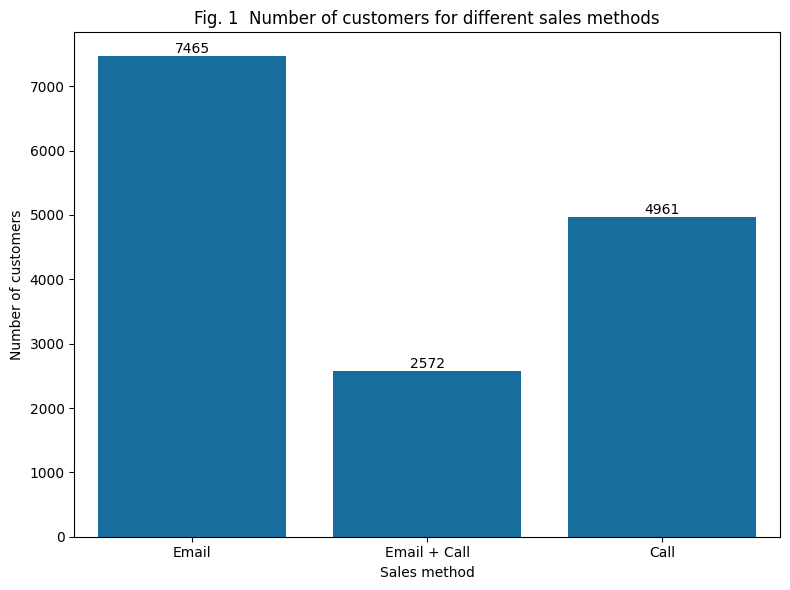

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(data = exam2, x = 'sales_method')
plt.title('Fig. 1  Number of customers for different sales methods')
plt.ylabel('Number of customers')
plt.xlabel('Sales method')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

The following histogram (see Fig. 2 below) shows the revenue distribution. The histogram (number of bins was set to 20) is multimodal. The average revenue value is \$93.62, the median is \$89.5.
The skew is 1.14 that indicates highly positively skewed distribution. Since there is a strong positive correlation between the number of sold products ('nb_sold' column) and the 'revenue' column (see Fig. 3 below), the positive skewness of the revenue histogram suggests that the majority of customers prefer buying less expensive products. The minimal revenue value is \$32.54 and the maximal revenue value is \$238.32. The revenue range is \$205.78

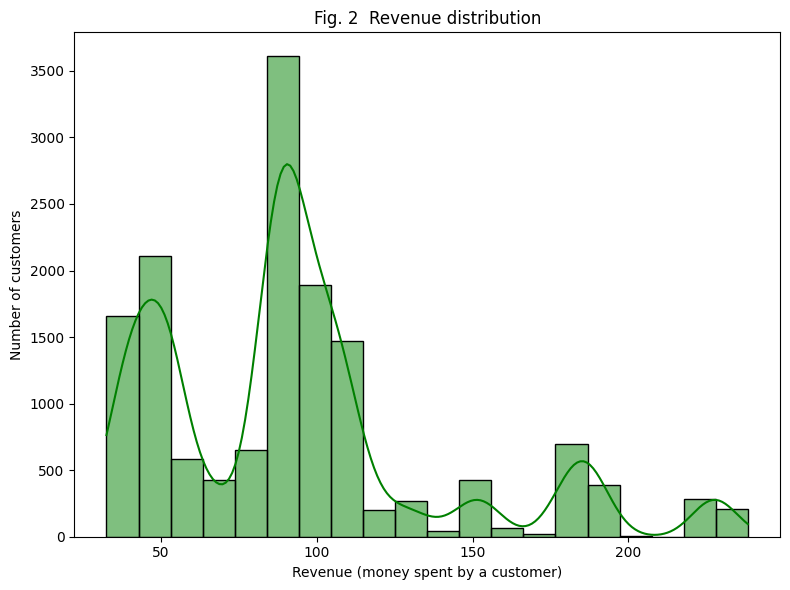

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.histplot(data = exam2, x = 'revenue', color = 'green', kde = True, bins = 20)
plt.title('Fig. 2  Revenue distribution')
plt.ylabel('Number of customers')
plt.xlabel('Revenue (money spent by a customer)')
ax.tick_params(axis='x', which='minor', bottom=False)
plt.tight_layout()
plt.show()

As it is shown in Fig. 3, there is a strong positive correlation between "n_sold" and "revenue" columns for all 3 sales methods (correlation coefficient is 0.97 for Email, 0.99 for Email + Call and 0.99 for Call method, correspondently). The largest median value of sold products was observed for Email + Call method (12.0), followed by Email (9.72) and Call (9.51) methods.

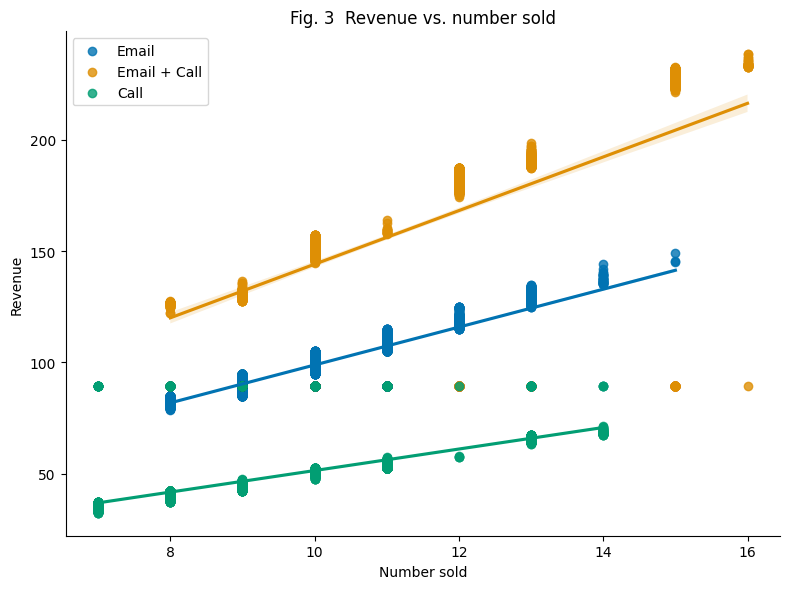

In [28]:
g = sns.lmplot(data = exam2, x='nb_sold', y='revenue',  hue = 'sales_method', legend = False)
g.fig.set_size_inches(8,6)
plt.legend(loc = "upper left")
plt.title('Fig. 3  Revenue vs. number sold')
plt.ylabel('Revenue')
plt.xlabel('Number sold')
plt.tight_layout()
plt.show()

To answer the question about the revenue distribution for each method, I have used a seaborn boxplot (see Fig. 4 below). The data shown in the Fig. 4 indicate that there is a correlation between sales method and revenue. The customers receiving Email + Call tend to spend more money (median revenue value is \$182.14, standard deviation is \$42.08), while the customers receiving a Call spend the least amount of money (median revenue value is \$49.93, standard deviation is \$11.54). The median value of revenue for customers, who get Email is \$94.27 and standard deviation is \$10.98

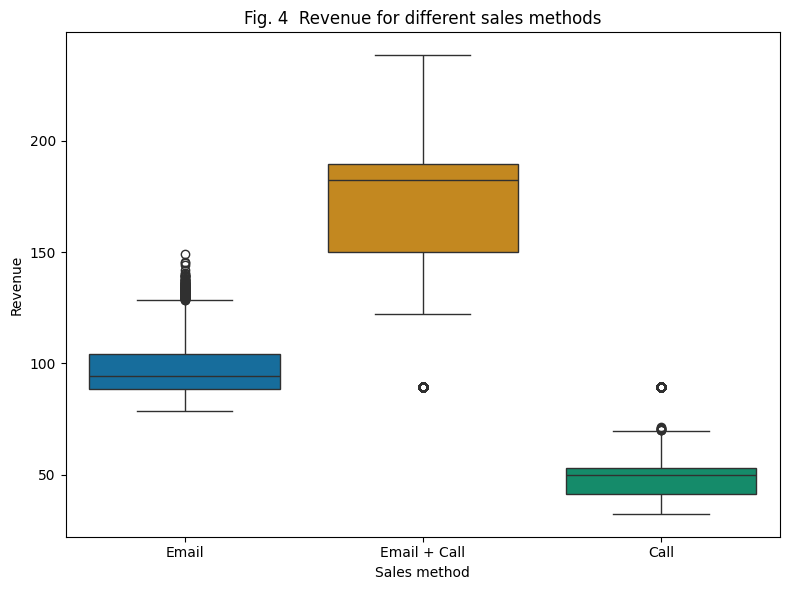

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.boxplot(data = exam2, x = 'sales_method', y = 'revenue', hue = 'sales_method')
plt.title('Fig. 4  Revenue for different sales methods')
plt.xlabel("Sales method")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()

I have further analyzed the total revenue for the customers receiving Email, Email + Call, and Call. The data shown in the Fig. 5 indicate that the highest total company revenue (\$720908.61) was generated by the customers receiving Email, followed by the customers receiving Email + Call (\$439492.19). The lowest total revenue was obtained from the customers receiving a Call (\$243712.52).

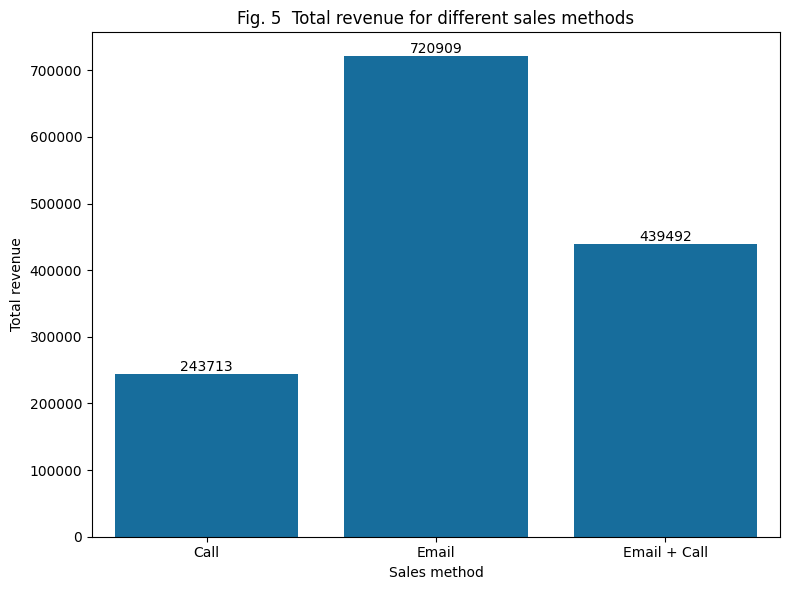

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sales_method_revenue = pd.DataFrame(exam2.groupby('sales_method')['revenue'].sum().reset_index(name = 'total'))
ax = sns.barplot(data = sales_method_revenue, x = 'sales_method', y = 'total')
plt.title('Fig. 5  Total revenue for different sales methods')
plt.ylabel('Total revenue')
plt.xlabel('Sales method')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

To answer the question about the revenue distribution over time for each sales approach, I have plotted a stacked bar diagram (see Fig. 6 below), where x-axis represents 'week' column and y-axis shows total revenue for each sales method.
As it is shown in the Fig. 6, the highest total revenue was observed during the first week the product was launch on the market (total revenue value is \$292858 for all 3 methods used). During the next 2 weeks the total revenue value was declining (\$212999 and \$197560 for week 2 and week 3, correspondently). After that, a new spike in total revenue was observed starting at week 4 (total revenue value increased up to \$252454). `
The total revenue continued to increase on week 5, reaching the value of \$273317 then a dramatic drop in total revenue value (\$174926) was observed. Interestingly, the customers receiving Email, contributed the most in the total revenue and spent more money during the first week. After that, the total revenue generated by the customers of this group gradually dropped. In opposite, the customers receiving Email + Call showed low activity the first week (the lowest total revenue value of \$18406.8) followed by a gradual increase in activity during the next 4 weeks. The highest total revenue value was obseved on week 5 (\$136744), followed by a slight drop in total revenue (\$119655) on week 6.

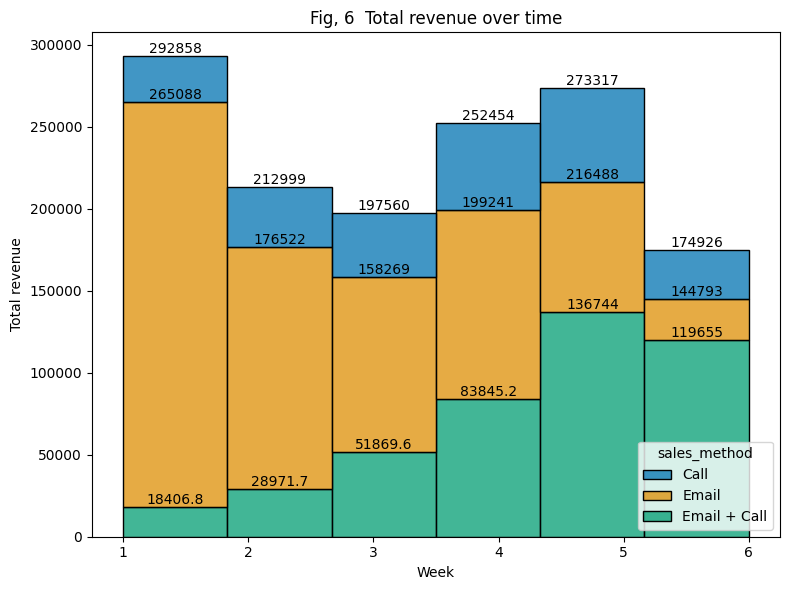

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))
total_weekly_revenue = pd.DataFrame(exam2.groupby(['week', 'sales_method'])['revenue'].sum().reset_index(name = 'counts'))
ax = sns.histplot(data = total_weekly_revenue, x='week', hue='sales_method', weights='counts', multiple='stack', binwidth = 0.8)
plt.title('Fig, 6  Total revenue over time')
plt.ylabel('Total revenue')
plt.xlabel('Week')
sns.move_legend(ax, loc='lower right')
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.show()

The next figure (Fig. 7, see below) presents the data on total revenue for customers in different states. Colors show the sale method used: green for customers receiving Call, blue for customers receiving Email and orange for customers receiving Email + Call. As it is shown in Fig. 7, there are 4 states that have a major effect on the total revenue. The largest total revenue was obtained from the customers in California, followed by Texas, New York and Florida, correspondently. As for the sales method, the group of customers received Email had the largest impact on the total revenue, followed by Email + Call group. The group of customers receiving Call was the least effective.

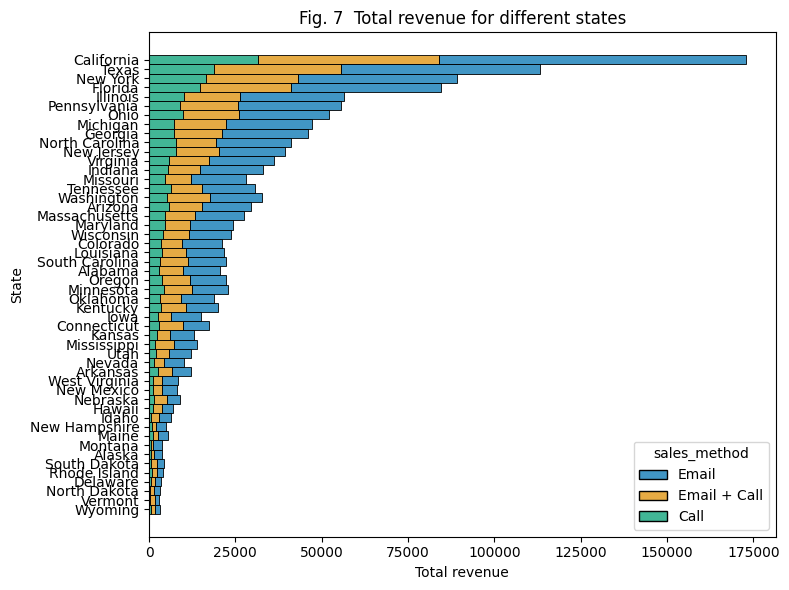

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
revenue_state = pd.DataFrame(exam2.groupby(['state', 'sales_method'])['revenue'].sum().reset_index(name='total_number').sort_values(by= 'total_number', ascending = False))

sns.histplot(data = revenue_state, y='state', hue = 'sales_method',  weights='total_number', multiple='stack', binwidth = 0.8)
plt.title('Fig. 7  Total revenue for different states')
plt.xlabel('Total revenue')
ax.set_ylabel('State', size = 10)
plt.tight_layout()
plt.show()

Fig. 8 shows how the number of years being a customer affects the total revenue of Pens and Printers. Colors represent the different sales methods. As it is shown in Fig. 8, the pattern of the distribution is the same for all three sales methods. The total revenue increased the first years (0 and 1 years as a customer) reaching maximum at 1 year, then the total revenue exponentially declined. Long-term customers (20+ years) do not contribute much to the total revenue of the company. The customers, who received Email, contributed the total revenue of the company the most, followed by the customers receiving Email + Call.

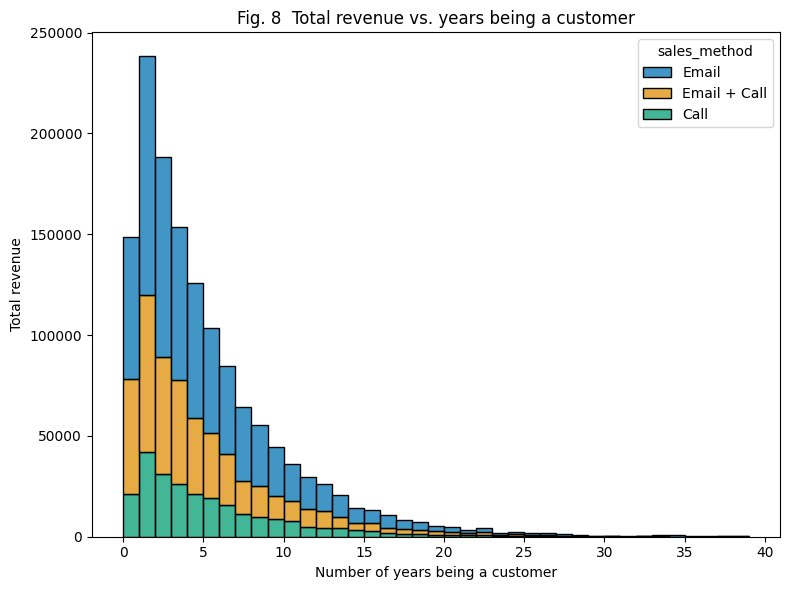

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
revenue_years_as_customer = pd.DataFrame(exam2.groupby(['years_as_customer', 'sales_method'])['revenue'].sum().reset_index(name='total_number').sort_values(by= 'total_number', ascending = False))
sns.histplot(data = revenue_years_as_customer, x='years_as_customer', hue = 'sales_method', weights='total_number', multiple='stack', binwidth = 1.0)
plt.title('Fig. 8  Total revenue vs. years being a customer')
plt.ylabel('Total revenue')
plt.xlabel('Number of years being a customer')
plt.tight_layout()
plt.show()


**Conclusions.**

Based on the results of analysis of the Pens and Printers "product_sales: dataset, I have come to _the following conclusions_:
1. Email receiving customer group was 1.5 times greater than Call receiving customer group, and 2.9 times greater than Email + Call receiving customer group.
2. The highest median revenue value was observed in Email + Call group, followed by Email group. The Call group had the lowest median revenue value.
3. The highest median nb_sold value was observed in Email + Call group, followed by Email group. The Call group had the lowest median nb_sold value.
4. The revenue distribution is right skewed, suggesting that the majority of Pen and Printers customers have low revenue values.
5. The total revenue, calculated as a sum of revenues of all customers for each sales method, was highest in Email group, followed by Email + Call group. The total revenue for Email group was 1.64 and 2.96 times higher than the corresponding values in Email + Call and Call groups.
6. Over time total revenue distribution for different sales methods showed that the customer group receiving Email was the most active during the first week, then its activity and, thus, contribution to the company revenue declined. In the opposite, the activity of the customers receiving Email + Call gradually increased reaching maximum at the 5th week.
7. The customers from the 4 states (California, Texas, New York and Florida) contributed the most in the total Pen and Printers revenue. The Email group contributed to the total revenue the most.
8. The total revenue of Pen and Printers was high for new customers and it increased further during the first year of the customer membership. After that the total revenue exponentially declined. Long-term (20+) Pen and Printers customers hardly contributed to the total Pen and Printers revenue.

**Recommendations.**

1. The Email sale method has showed to be the most effective method impacting the total revenue of Pens and Printers company. It is the cheapest method that does not require a human operator to contact the customer. I would recommend to continue with it. Since the Email receiving group of customers tends to reduce the activity over time. I would recommend to send the 3d email to the customers of this group 2 - 3 weeks after the second email was sent. Due to the fact that total revenue gradually declined with years being a Pen and Printers customer, I would recommend to stimulate interest of long-term customers by providing them a discount based on the term of their membership. I would also recommend to concentrate more attention on the customers from the 4 states (California, Texas, New York and Florida), since they contributed the most in the total revenue of Pen and Printers company.
2. The Email + Call sale method was the second-best method affecting the total revenue of Pens and Printers company. The method requires a Sales Representative to contact a customer and spend 10 minutes on phone call one week after Email was sent. The median value of revenue of this group of customers was higher in comparison with the Email receiving group of customers. Number of customers and total revenue in the group were 2.9 and 1.64 times, respectively, lower than the corresponding values in the Email group. It means that if the same number of customers were in Email and Email + Call groups, the latter group would generate total revenue of \$1275586.78 that exceeds the value of the total revenue for Email group (\$720908.61). The fact that the total revenue generating by this group of customers has a tendency to increase over time suggests that the strategy when a customer first gets Email and then gets a Call from the Sales Representative works right. I would recommend to continue with this sales method paying more attention to the customers in California, Texas, New York and Florida, who contributed the most in the total revenue of the company. I would also recommend to increase the number of customers receiving Email + Call.
3. The Call sale approach, that requires a Sales Representative to contact the customer and spend 30 minutes on phone call, affected the total revenue of Pen and Printers the least. The number of customers in the Call group was 1.93 times higher but the median revenue value and the total revenue were 3.65 times and 1.8 times lower in comparison with Email + Call group. Thus, I would recommend to discontinue with the Call sales method.


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation